# Первичное исследование данных

In [39]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
import seaborn as sns
from scipy import stats as st

In [40]:
#откроем файл
data = pd.read_csv('/datasets/games.csv')

In [41]:
#выведем часть таблицы на экран и посморим на отображение 
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [42]:
#выведем на экран информацию о данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [43]:
# проверим столбцы
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [44]:
#Подсчитаем количество пропущенных значений

pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm')

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


In [45]:
#также посчитаем количество пропущенных значений в %, просто потому что меня этому научили на прошлом ревью 

pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [46]:
#Посчитаем количество полных дубликатов
data.duplicated().sum()

0

 # Вывод 

Необходимо привести к правильному типу столбец : Year of Release и User_Score   
Необходимо привести к нижнему регистру столбцы нашей таблицы, а также названия колонок.   
Tип данных года выпуска указан float64, а User_Score - object.   
Имеются пустые значения в столбцах rating, user_score, critic_score.   
Дубликатов нет

____

# Предобработка данных

### Приведение названия столбцов к нижнему регистру 

In [47]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим на змеиный регистр наименования в столбцах 'name','platform', 'genre', 'rating' так как может написание быть разное - исключить неявные дубликаты.

In [48]:
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропущенных значений

In [49]:
pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


In [50]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Исходя из полученных данных мы можем выявить 5 столбцов с пропущенными значениями:  

- user_score
- critic_score
- year_of_release
- name	
- genre

Но в обработке значений нуждаются только первые 2: 
- user_score
- critic_score  
В них пропущено больше 50% значений  

Столбцы 
- year_of_release
- name	
- genre  

Не нуждаются в обработке, т.к. пропущенных значений там менее 5% 


In [51]:
# удаляем строки с пропущенными значениями методом dropna()
data = data.dropna(subset=['year_of_release'])
print('пропущенных значений years_of_release:', data['year_of_release'].isna().sum()) #проверяем

пропущенных значений years_of_release: 0


In [52]:
# удаляем строки с пропущенными значениями методом dropna()
data = data.dropna(subset=['name'])
print('пропущенных значений name:',data['name'].isna().sum()) #проверяем

пропущенных значений name: 0


In [53]:
# удаляем строки с пропущенными значениями методом dropna()
data = data.dropna(subset=['genre'])
print('пропущенных значений genre:',data['genre'].isna().sum()) #проверяем

пропущенных значений genre: 0


Пропуски в стобцах user_score, critic_score, к сожалению, мы не сможем ничем заполнить.   
Заполнение исказит результаты  анализа.   
Причины, которые могли привести к пропускам: неправильный сбор данных или отсутствие информации. 

### Изменение типа данных

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [55]:
# Поменяем формат столбца user_score на float
data['user_score'] = data['user_score'].astype(float)

ValueError: could not convert string to float: 'tbd'

При попытке поменять тип данных столбца user_score на float64 возникает ошибка и появлятеся новая абревиатура 'tbd'.  
Обратим на нее внимание. Отдельно разберем это значение и опишем, как его обработать.   
Аббревиатура tbd - to be determined, to be done. Это аббревиатура, которая означает что значение ещё не определено и будет определено позже, так что такое значение равносильно пропуску.  
Предлагаю заменить tbd на Nan

In [57]:
#Заменим tbd 
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
# Поменяем формат столбца user_score на float
data['user_score'] = data['user_score'].astype(float)
display(data['user_score'].dtype)

dtype('float64')

In [58]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [59]:
# заменили тип данных на целые числа
data['year_of_release'] = data['year_of_release'].astype('int64')
data['year_of_release'].dtype

dtype('int64')

In [60]:
#Заменим пропуски на unknown
data['rating'] = data['rating'].fillna('unknown')
data['rating'].head()

0          e
1    unknown
2          e
3          e
4    unknown
Name: rating, dtype: object

In [61]:
#проверим правильность смены типов данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [62]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Вывод по предобработке данных

- Мы привели к правильному типу столбец : year_of_release и rating. 
- Привели к нижнему регистру названия колонок. 
- Tип данных года выпуска перевели в целые числа (int64) , а user_score - к типу float64. 
- Пустые значения в столбцах user_score, critic_score решили не трогать
- В столбцах year_of_release,genre и name удалили строки с пропусками тк их меньше 2%. 
- Пропуски в столбце rating заполнили на unknown 
- Дубликатов не обнаружено.
____

# Исследовательский анализ данных

### Проведем анализ данных и определим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

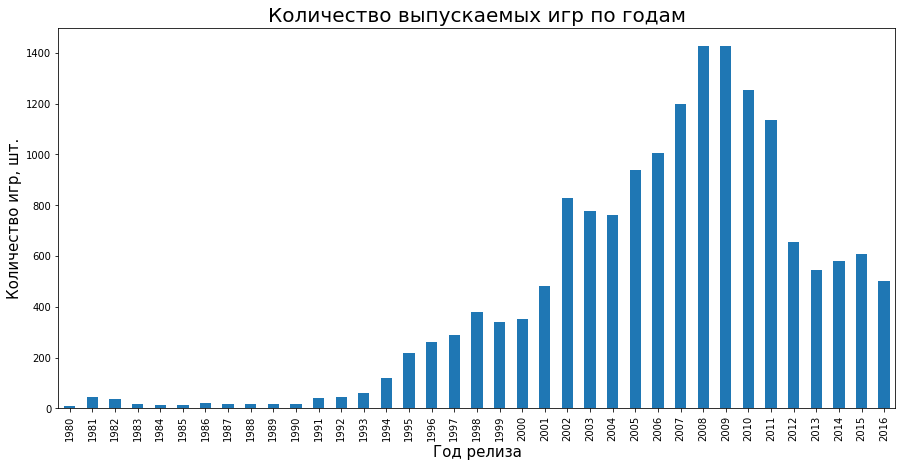

In [63]:
# Методом pivot отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
data.query('year_of_release != 0').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').\
plot(kind = 'bar', figsize = (15, 7), legend=None)
plt.title('Количество выпускаемых игр по годам', fontsize = 20)
plt.xlabel('Год релиза', fontsize = 15)
plt.ylabel('Количество игр, шт.', fontsize = 15)
plt.show()

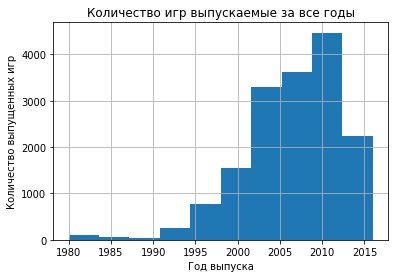

,year_of_release
count,16444.00
mean,2006.49
std,5.88
min,1980.00
25%,2003.00
50%,2007.00
75%,2010.00
max,2016.00


In [64]:
#проведем анализ методом describe() и построим гистограмму:
data[['year_of_release']].hist()
plt.title('Количество игр выпускаемые за все годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()
data[['year_of_release']].describe().round(2)

#### Промежуточный вывод:
Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой
скоростью с 1992 года. В 2016 году график обрывается. С 2009 года, после того как
массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных
игр.   

Необходимо взять данные за соответствующий актуальный период. Актуальный период аналитику нужно определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


### Как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами и построим распределение по количеству продаж, а затем по годам.   
Определим,за какой характерный срок появляются новые и исчезают старые платформы.

#### Распределение платформ по годам

In [65]:
#построим дополнительную таблицу для наглядного отображения данных 
platform_pvt = data.query('year_of_release != 0').pivot_table(index = ['platform', 'year_of_release'],\
                                                            values = 'total_sales', aggfunc = 'sum').reset_index()
platform_pvt

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,xb,2008,0.18
234,xone,2013,18.96
235,xone,2014,54.07
236,xone,2015,60.14


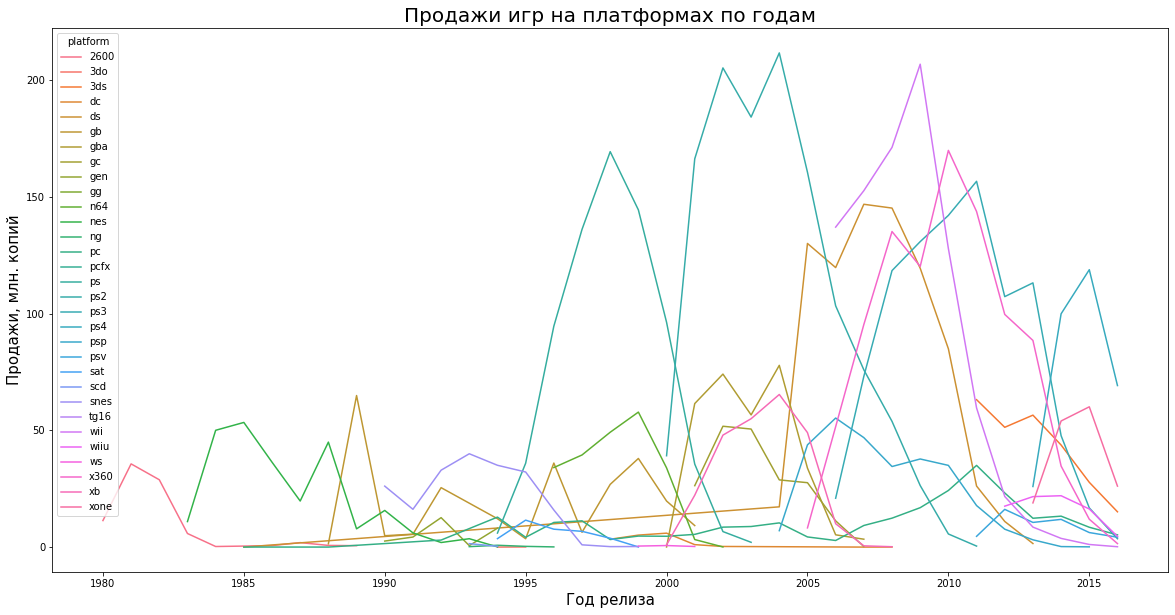

In [66]:
#построим линейный график с продажами на платформах по годам
plt.figure(figsize=(20, 10))
plt.title('Продажи игр на платформах по годам', fontsize = 20)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platform_pvt)
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Продажи, млн. копий', fontsize=15)
plt.show()

- Основная масса данных сосредоточена в период с 2000 до 2016 года;
- В среднем, платформа остается актуальной в течение пяти-шести лет. Исключение составляет Playstation 2, которая продолжала оставаться актуальной до 2011 года, несмотря на то, что в 2006 году вышла Platstation 3;
- PC держится дольше остальных платформ (с 1994 года), но это объяснимо тем, что это мультиплатформа;
- Основными лидерами являются консоли Playstation, они показывают самые высокие показатели. У Playstation 2 самые высокие значения за весь период.

#### Платформы с наибольшими суммарными продажами

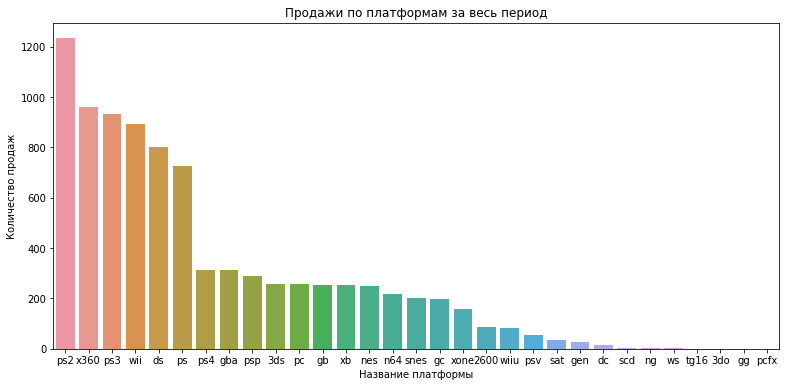

In [67]:
#Методом pivot отсортируем таблицы и отрисуем график, чтобы просмотреть рейтинги продажи игровых платформ
sales_by_platform = data.pivot_table(
 index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sales_by_platform.index,y=sales_by_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

In [68]:
#проверим вывод распределения по получению данных и выведем список лидеров 
data_top_platform = platform_pvt.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
sort_values(by ='total_sales', ascending = False)
data_top_platform.head()

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78


In [69]:
top5_platform = platform_pvt.query('platform in ("ps2", "x360", "pS3", "wii", "ds")')
top5_platform.head()

,platform,year_of_release,total_sales
25,ds,1985,0.02
26,ds,2004,17.27
27,ds,2005,130.14
28,ds,2006,119.81
29,ds,2007,146.94


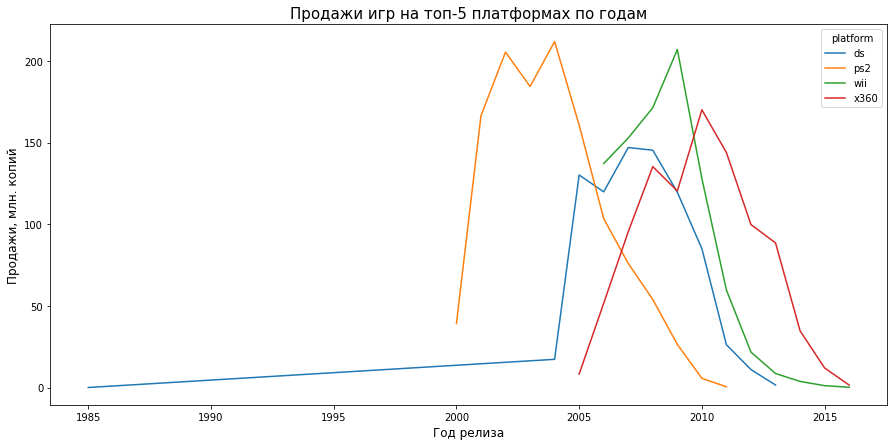

In [70]:
#построим линейный график с продажами на топ5 платформах по годам
plt.figure(figsize=(15, 7))
plt.title('Продажи игр на топ-5 платформах по годам', fontsize = 15)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top5_platform)
plt.xlabel('Год релиза',fontsize=12)
plt.ylabel('Продажи, млн. копий',fontsize=12)
plt.show()

In [71]:
#посчитаем, за какой характерный срок появляются новые и исчезают старые платформы
platform_life = platform_pvt.groupby('platform').agg({'year_of_release': ['max', 'min']})
platform_life.columns = ['max', 'min']
platform_life['life'] = platform_life['max'] - platform_life['min']
print('Средний срок жизни платформы:', platform_life['life'].mean().round(2))

Средний срок жизни платформы: 7.61


# Вывод исследования "Как менялись продажи по платформам"

Судя по проведенному анализу и графикам, которые показывают, как менялись продажи по платформам по годам, видно заметное увеличение продаж на некоторых платформах после 1995 года.

Были выделены топ5 платформ с наибольшими результатами по продажам: "PS2", "X360", "PS3", "Wii", "DS", просмотрены их продажи по годам

Также была определена средняя продолжительность жизни платформы -  7.6 лет 

Актуальным периодом были выбраны данные с 2011 по 2016 год.

Первая причина -  после 2011 почти в два раза упало количество производимых игр и с 2011 до 2016 это число держится на примерно одинаковой отметке, этот факт должен быть запечатлен в анализе для построения дальнейшего прогноза.

Вторая причина -  средняя продолжительность жизни платформ составляет 7.6 лет, необходимо, чтоб в наши данные входили и платформы, которые постепенно угасают, и те, которые только набирают обороты, нет смысла брать более ранние периоды, т.к. для анализа необходима актуальная информация.

In [72]:
data_actual = data.query('year_of_release >= 2011').reset_index()
data_actual

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
1,23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
2,29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
3,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
4,33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4018,16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4019,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
4020,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


### Продажи по платформам за актуальный период

В данном исследовании необходимо выявить:

- Какие платформы лидируют по продажам, растут или падают? 
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Выявить, что можно сказать о самых прибыльных жанрах. Определить, выделяются ли жанры с высокими и низкими продажами?
_____

In [73]:
#строю сводную таблицу для каждый из платформ по продажам по годам в выбранный период времени
data_actual_pvt = data_actual.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales',\
                                      aggfunc = 'sum').reset_index()
data_actual_pvt.head(10)

,platform,year_of_release,total_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78
5,3ds,2016,15.14
6,ds,2011,26.18
7,ds,2012,11.01
8,ds,2013,1.54
9,pc,2011,35.03


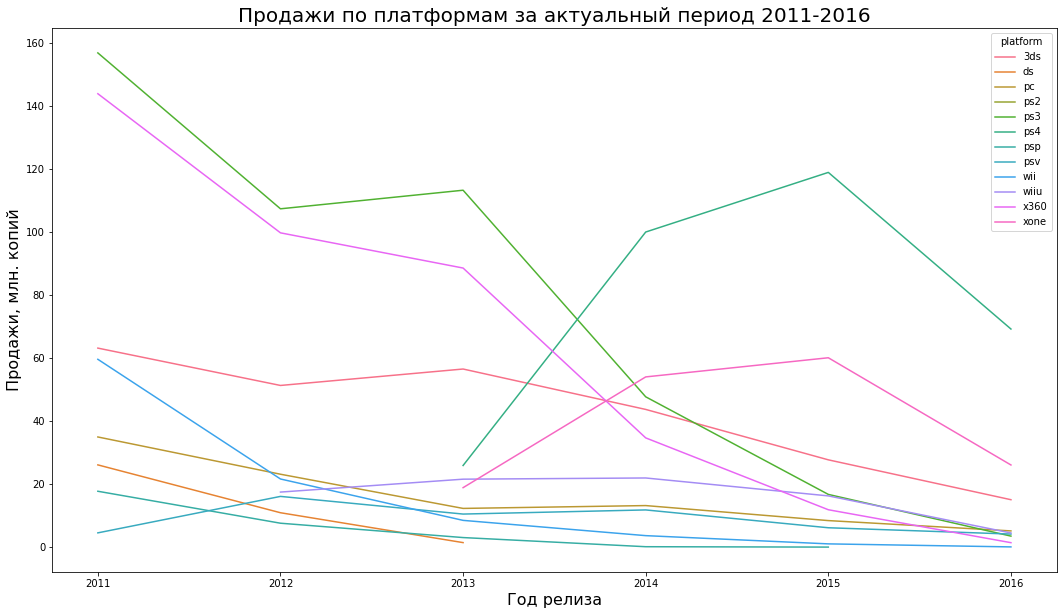

In [74]:
plt.figure(figsize=(18, 10))
plt.title('Продажи по платформам за актуальный период 2011-2016', fontsize = 20)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data_actual_pvt)
plt.xlabel('Год релиза',fontsize=16)
plt.ylabel('Продажи, млн. копий',fontsize=16)
plt.show()

В выборку вошло 12 платформ. Принимая во внимание условие о том, что данные за 2016 год неполные, их можно не учитывать при выстраивании вывода из данных. 

Итого по продажам на платформах, попавших в актуальный период:

- прекратили выпуск игр: DS (в 2013), PS2 (в 2011), PSP (в 2015)

- продажи падают: 3DS, PC, PS3, PSV, Wii, WiiU, X360

- продажи растут: PS4 (лидер рынка), XOne, (в связи с тем, что это обновленный продукт и новая модель)

таким образом, к потенциально прибыльным платформам с прогнозом их роста и развития на 2017 год можно отнести только две: PS4 и XOne

____

### Построение "ящика с усами" для анализа данных

In [75]:
#определим распределение значений и долю выбросов 
data['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

<div class="alert alert-info"> <b> Покажем сперва все продажи - вместе с выбросами, для просмотра распределения значений </b> 
    
 </div>

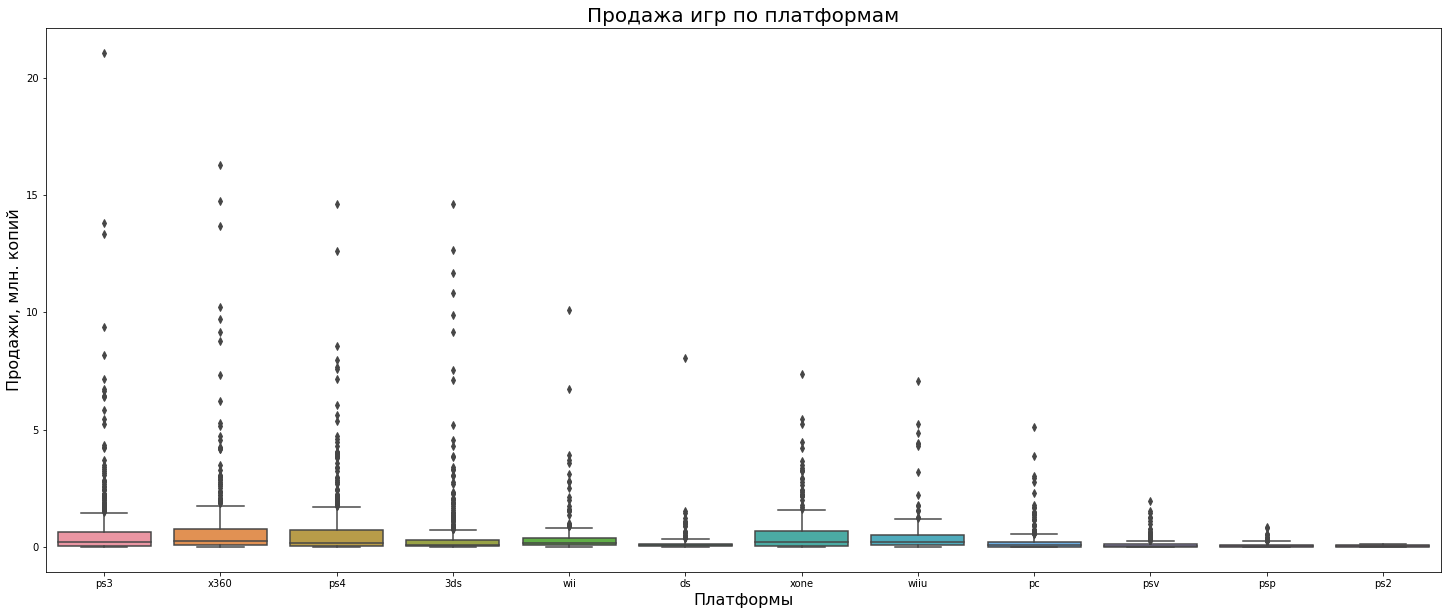

In [76]:
#построим боксплоты по глобальным продажам игр в разбивке по платформам
plt.figure(figsize = (25, 10))
plt.title('Продажа игр по платформам', fontsize = 20)
ax = sns.boxplot(x = "platform", y = "total_sales", data = data_actual)
plt.xlabel('Платформы',fontsize=16)
plt.ylabel('Продажи, млн. копий',fontsize=16)
plt.show()

У всех платформ можно заметить следующую тенденцию: медианные продажи крайне низкие. Однако выбросов при этом очень много и некоторые доходят до очень высоких значений по продажам. Отсюда можно сделать вывод, что время от времени выстреливают отдельные крайне удачные игры.

<div class="alert alert-info"> <b> Построим дополнительный график без выбросов для более подробного рассмотрения распределения значений  </b> 
    
 </div>

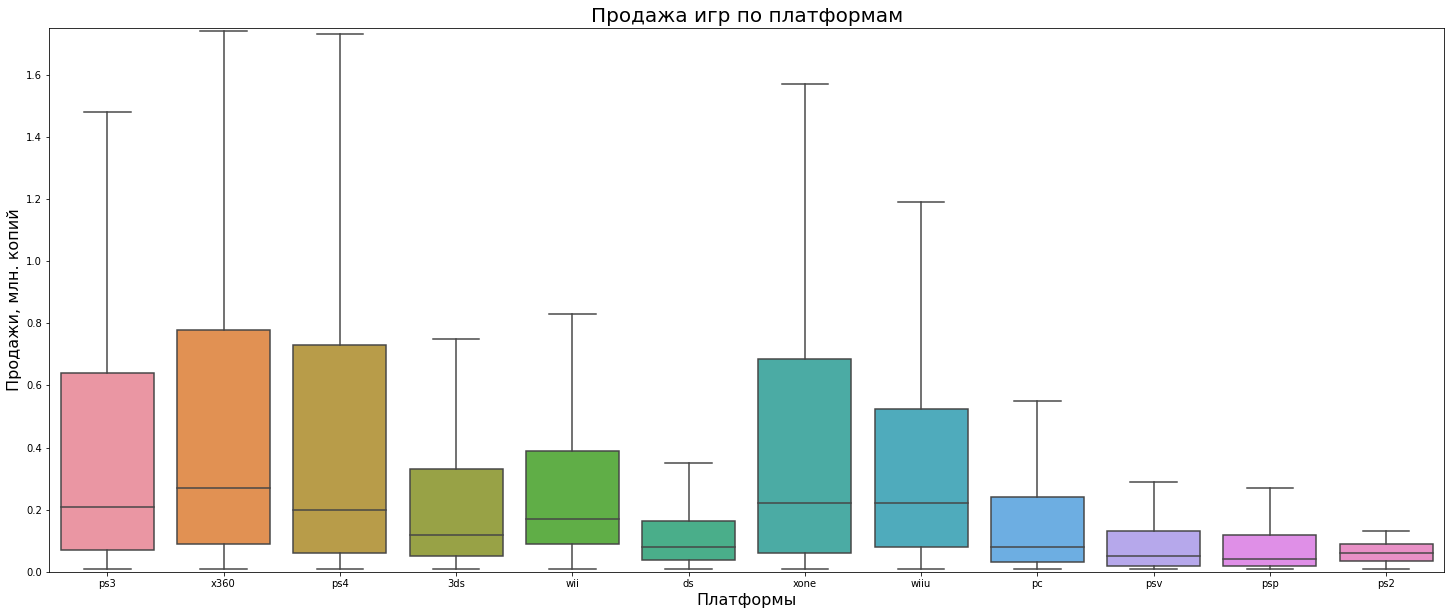

In [77]:
#построим боксплоты по глобальным продажам игр в разбивке по платформам
plt.figure(figsize = (25, 10))
plt.title('Продажа игр по платформам', fontsize = 20)
ax = sns.boxplot(x = "platform", y = "total_sales", data = data_actual, showfliers=False)
ax.set_ylim([0, 1.75])
plt.xlabel('Платформы',fontsize=16)
plt.ylabel('Продажи, млн. копий',fontsize=16)
plt.show()

Платформы с самым большим межквартильным размахом продаж игр - PS3, X360, PS4, XOne, WiiU.

Наибольшая медианная прибыль была у X360.

Стоит помнить, что все изображенные платформы, кроме PS4 и XOne, либо прекратили выпускать игры, либо ускоренно к этому движутся. У PS4 и XOne на графиках и так хорошие результаты, но судя по данным 2015 года, они еще успеют увеличить свои продажи.

Выбросы указывают на то, что на платформах выпускались такие игры, которые продавались очень большим тиражом, но все же это случаи, выходящие за обычные рамки продаж, которые выделяюся на графиках цветом (межквартильный размах). То есть по графику видим, что у платформ PS3, X360, PS4, XOne, WiiU были выпущены такие игры, которые разошлись на 1.3-1.7 млн проданных копий, но это скорее исключение, нежели правило, так как большинство игр вписывалось в рамки 100-700тыс шт

____

In [78]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Исследование влияния отзывов пользователей и критиков на продажи

Для исследования возьмем 5 топовых платформ:

- ps4
- xone 
- x360
- ps3	
- wii	

И  проведем исследования

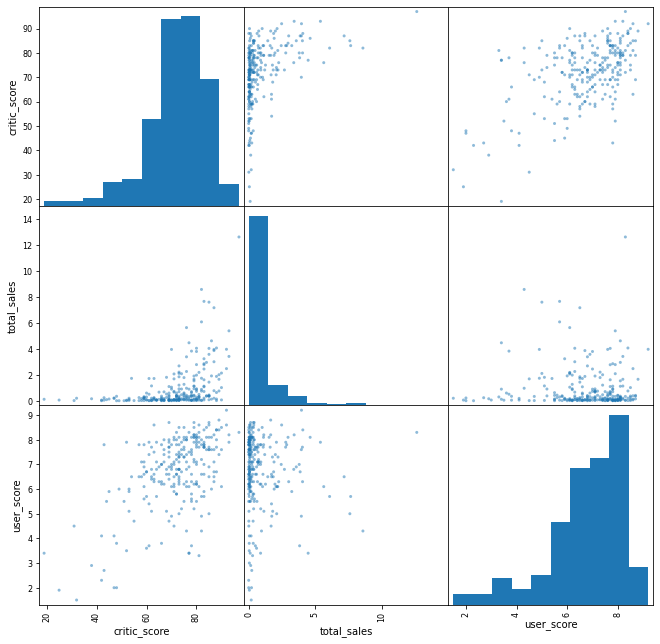

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


In [79]:
#проведем исследование, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
#для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами PS4
data_actual_ps4 = data_actual.query('platform == "ps4" and critic_score != "NaN" and user_score != "NaN"').\
pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(data_actual_ps4, figsize=(11, 11)) 
plt.show()
data_actual_ps4.corr()

Построив диаграммы рассеяния и посчитав корреляцию между отзывами критиков и зрителей и продажами для платформы PS4, можно сделать вывод, что для платформы характерна корреляция между продажами и отзывами критиков.  

Корреляция между продажами и отзывами критиков выражена слабо но стремится в большую сторону;  
Корреляция между продажами и отзыми пользователей практически отсутствует (-0.03).  
Можно предположить, что чем выше у игры будут оценки критиков, чем больше будут ее продажи. Оценка критиков имеет гораздо больший вес, чем оценка простых игроков.  
Из чего можно заключить вывод, что зависимость существует, только от рейтинга критиков  
____

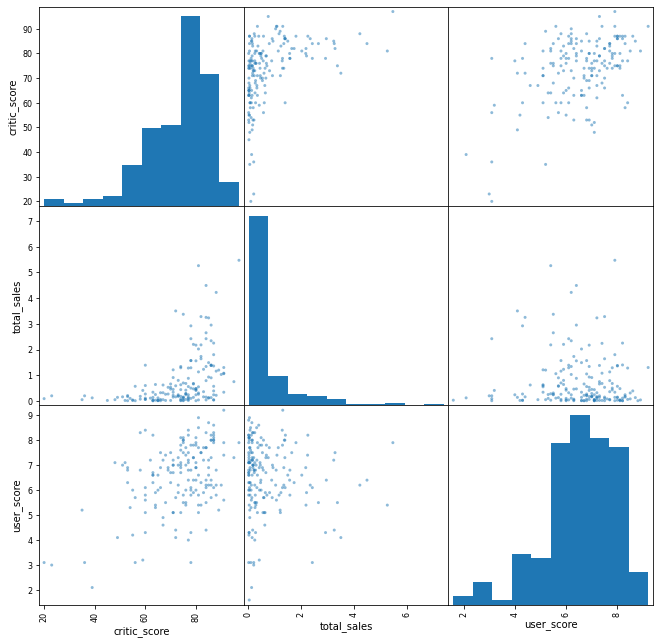

,critic_score,total_sales,user_score
critic_score,1.000000,0.416998,0.472462
total_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


In [80]:
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами XOne
data_actual_xone = data_actual.query('platform == "xone" and critic_score != "NaN" and user_score != "NaN"').\
pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(data_actual_xone, figsize=(11, 11)) 
plt.show()
data_actual_xone.corr()

- Корреляция между отзывами критиков и продажами выражена cлабо, но стремиться в большую сторону (0.41);
- Корреляция между отзывами пользователей и продажами выражена отрицательно (-0.06).  
Можно предположить, что чем выше у игры будут оценки критиков, чем больше будут ее продажи. Оценка критиков имеет гораздо больший вес, чем оценка простых игроков.  
Из чего можно заключить вывод, что зависимость существует, только от рейтинга критиков



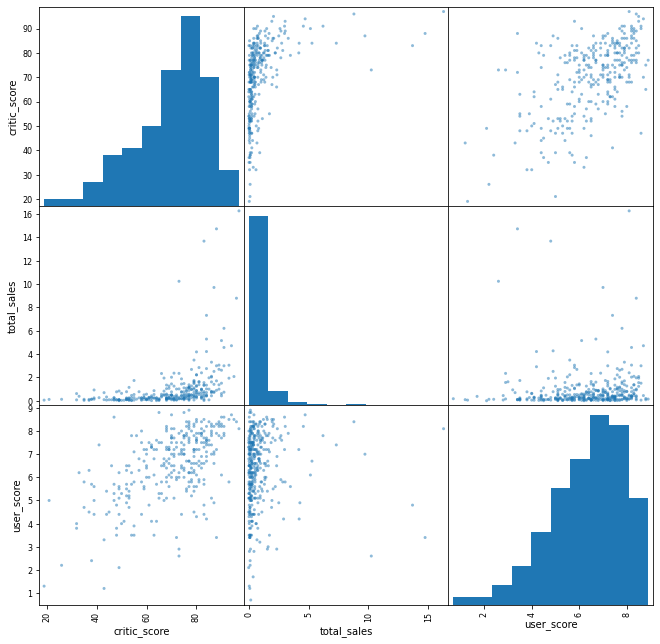

,critic_score,total_sales,user_score
critic_score,1.000000,0.391253,0.568386
total_sales,0.391253,1.000000,0.038918
user_score,0.568386,0.038918,1.000000


In [81]:
#соотнесем выводы с продажами игр на других платформах
data_actual_x360 = data_actual.query('platform == "x360" and critic_score != "NaN" and user_score != "NaN"').\
pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(data_actual_x360, figsize=(11, 11)) 
plt.show()
data_actual_x360.corr()

- Корреляция между отзывами критиков и продажами выражена слабо (0.39), но стремится в большую сторону;  
- Корреляция между отзывами пользователей и продажами выражена очень малой зависимостью (-0.04).  
Исходя из исследования видно, что оценки критиков X360 имеют больший вес, чем оценки пользователей.

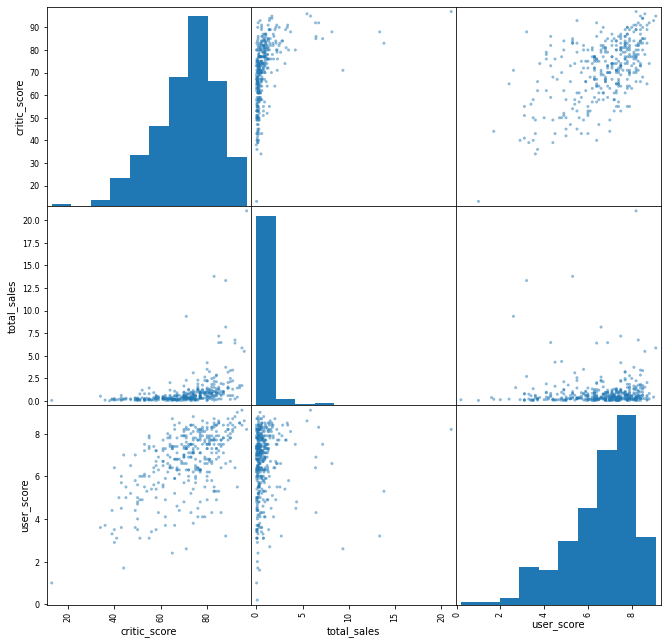

,critic_score,total_sales,user_score
critic_score,1.000000,0.381991,0.566670
total_sales,0.381991,1.000000,0.013221
user_score,0.566670,0.013221,1.000000


In [82]:
data_actual_ps3 = data_actual.query('platform == "ps3" and critic_score != "NaN" and user_score != "NaN"').\
pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(data_actual_ps3, figsize=(11, 11)) 
plt.show()
data_actual_ps3.corr()

- Корреляция между отзывами критиков и продажами выражена слабо (0.38), но стремится в большую сторону;
- Корреляция между отзывами пользователей и продажами выражена очень малой зависимостью (0.01).  
Исходя из исследования видно, что оценки критиков PS3 имеют больший вес, чем оценки пользователей.

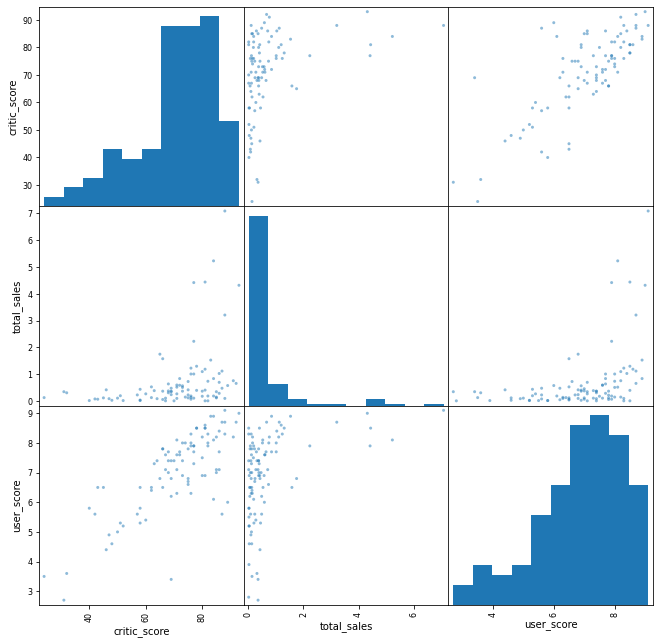

,critic_score,total_sales,user_score
critic_score,1.00000,0.348380,0.770080
total_sales,0.34838,1.000000,0.400219
user_score,0.77008,0.400219,1.000000


In [83]:
data_actual_wiiu = data_actual.query('platform == "wiiu" and critic_score != "NaN" and user_score != "NaN"').\
pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(data_actual_wiiu, figsize=(11, 11)) 
plt.show()
data_actual_wiiu.corr()

- Корреляция между отзывами критиков и продажами выражена слабо (0.34);
- Корреляция между отзывами пользователей и продажами выражена слабой, но отклоняющейся в большую сторону зависимостью(0.4).  
Исходя из исследования видно, что оценки пользователей Wiiu имеют больший вес, чем оценки пользователей.

#### Общий вывод по корреляции 

- Сильнее всех корреляция между отзывами критиков и продажами выражена на платформах XBOX ONE и Playstation 4;
- Слабее всех корреляция между отзывами критиков и продажами выражена на платформах Playstation 3 и Wii;
- Сильнее всех корреляция между отзывами пользователей и продажами выражена на плафторме Wii;
- Слабее всех корреляция между отзывами пользователей и продажами выражена практически на всех платформах.  
В целом, кроме платформы Wii, на успех видеоигр больше влияют оценки профессиональных критиков, чем обычных игроков.

### Исследование наиболее прибыльных жанров игр

<div class="alert alert-info"> <b> Вместо суммы всех продаж, как основания проведения анализа, укажем медиану продаж по каждому жанру и изменим график на столбчатую диаграмму для отображения значений  </b> 
    
 </div>

Text(0, 0.5, 'Медианное значение')

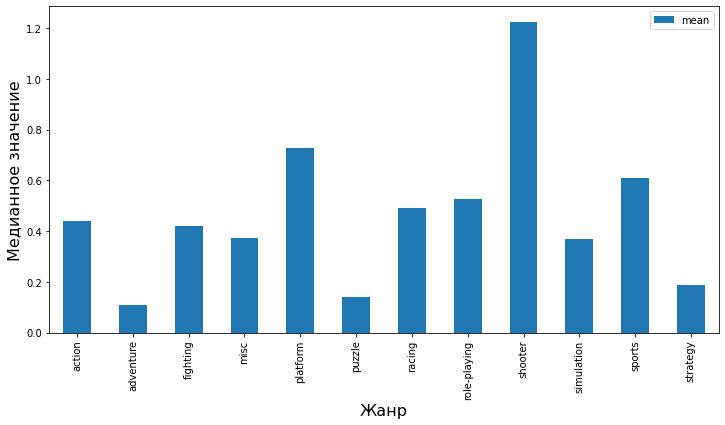

In [84]:
#посмотрим на общее распределение игр по жанрам
data_actual_genre = data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['mean']).sort_values(by = 'genre')
data_actual_genre.columns = ['mean']
data_actual_genre.sort_values(by = 'mean', ascending = False)
data_actual_genre.plot(kind='bar', figsize=(12,6))
plt.xlabel('Жанр',fontsize=16)
plt.ylabel('Медианное значение',fontsize=16)

- Самым прибыльными жанром является Shooter (а был Action), а неприбыльным Adventure (а был Puzzle, ты прав на счет медианного значения);
- Хорошие показатели у жанров Shooter, Platform и Sports;
- Средние показатели у жанров  Action, Fighting, Platform, Racing, Role Playing, Simulation, Misc;
- Низкие показатели у жанров Adventure, Puzzle, Stretegy. 

В целом, можно сказать, что самые динамичные, захватывающие жанры, расположены на лидирующих позициях, в то время, как медитативные жанры, например, Puzzle и Strategy не могут похвастаться такими значениями. Вполне возможно, что они менее востребованы на рынке и у них достаточно маленькая аудитория.

<div class="alert alert-info"> Все поправил, и правда результаты теперь заиграли новыми красками
     </div>

_____
### Общий вывод по исследовательскому анализу данных 

#### Результаты по всем данным
- Топ-5 платформ - Playstation 2, XBOX 360, Playstation 3, Wii, 3DS;
- Большего всего игр выпущено в период с 2005 по 2099 год;
- Меньше всего игр выпущено в период с 1980 по 1994 год;
- Основной объем данных по суммарным продажам распределен в диапазоне от 2000 до 2016 года. Основными лидерами по продажам являются игровые консоли Playstation;
- Средняя продолжительность жизненного цикла платформы составляет 5-6 лет лет. Дольше всех продержались Playstation 2 (самая успешная игровая консоль) и PC;
- Актуальный период для исследования - с 2012 по 2016 год.


#### Результаты по актуальному периоду
- Топ-5 платформ - Playstation 4, Playstation 3, XBOX 360, Wii, XBOX ONE;
- Если учитывать только новое поколоение консолей, то лидерами по продажам являются Playstation 4 и XBOX ONE. Предыдущее поколение консолей тоже показывает хорошие показатели, но они постепенно снижаются. В целом, у всех платформ наблюдается спад по продажам к 2016 году;
- Медианные значения у PS3, PS4, XBOX ONE и XBOX360 распределены одинаково. Очевидно, что продажи игр схожи между собой на этих платформах.
- Оценки критиков играю большую роль в продажах видеоигр, чем оценки обычных пользователей, о чем свидетельствуют данные по корреляции, но в Wii большую роль играют оценки пользователей;
- Самый прибыльный жанр Action, а неприбыльный Puzzle. Также хорошие показатели у жанров Shooter, RPG и Sports.

_____

# Портреты пользователей

### Определим топ-5 платформ для каждого региона

#### Платформы в NA

In [85]:
data_actual_na = data_actual[['platform', 'genre', 'na_sales']]
data_actual_na.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').\
sort_values(by = 'na_sales', ascending = False).head()

,na_sales
platform,
x360,226.80
ps3,168.26
ps4,108.74
xone,93.12
3ds,82.65


#### Платформы в EU

In [86]:
data_actual_eu = data_actual[['platform', 'genre', 'eu_sales']]
data_actual_eu.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').\
sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
platform,
ps3,163.10
ps4,141.09
x360,117.10
3ds,61.27
pc,56.70


#### Платформы в JP

In [87]:
data_actual_jp = data_actual[['platform', 'genre', 'jp_sales']]
data_actual_jp.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').\
sort_values(by = 'jp_sales', ascending = False).head()


,jp_sales
platform,
3ds,100.62
ps3,49.39
psp,24.04
psv,21.84
ps4,15.96


#### Промежуточный вывод 

В Японии на первом месте платформа 3DS - производство Nintendo, Япония, а также Sony, вероятно, этим объясняется такое распределение продаж по платформам. В Северной Америке на первом месте X360 - производства Майкрософт, США. Европа больше приносит продаж по PS. (где родился там и пригодился)

### Определим топ 5 жанров для каждого региона 

#### Жанры в NA

In [88]:
#определим для пользователя региона NA: Самые популярные жанры (топ-5)
data_actual_na.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').\
sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
action,230.92
shooter,194.43
sports,108.70
role-playing,83.78
misc,69.69


#### Жанры в EU

In [89]:
#----//----
data_actual_eu.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').\
sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
action,199.12
shooter,148.02
sports,88.48
role-playing,62.30
racing,40.58


#### Жанры в JP 

In [90]:
#---//---
data_actual_jp.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').\
sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
role-playing,79.87
action,63.62
misc,17.60
fighting,12.38
platform,12.13


#### Промежуточный вывод 

В Америке и Европе совпадают первые 4 жанра в топ-5, в то время как в Японии топ-5 сильно отличается, на первом месте - Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [91]:
data_actual_esrb = data_actual.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'],\
                                       aggfunc = ['sum', 'mean'])
data_actual_esrb

sum                        mean                    
        eu_sales jp_sales na_sales  eu_sales  jp_sales  na_sales
rating                                                          
e         141.73    36.68   170.17  0.229337  0.059353  0.275356
e10+       78.00    11.23   117.72  0.171053  0.024627  0.258158
ec          0.00     0.00     0.42  0.000000  0.000000  0.420000
m         250.26    26.14   308.45  0.402347  0.042026  0.495900
rp          0.03     0.00     0.00  0.030000  0.000000  0.000000
t          83.16    33.39   109.31  0.135000  0.054205  0.177451
unknown   116.61   138.21   123.69  0.068273  0.080919  0.072418

Портреты пользователей

---
Портрет пользователя США
1. Предпочитаемая платформа: консоль марки XBOX;
2. Предпочитаемые жанры: Action и Shooter;
3. Предпочитаемый возврастной рейтинг: M.
--- 

Портрет пользователя Европа

---
1. Предпочитаемая платформа: консоли марки Playstation;
2. Преподчитаемые жанры: Action и Shooter;
3. Предпочитаемый возрастной рейтинг: M.

---
Портрет пользователя Япония

---
1. Предпочитаемая платформа: 3DS;  
2. Предпочитаемые жанры: RPG и Action;
3. Преподчитаемый возврастной рейтинг: E и T.

---


В целом, портреты пользоватей в США и в Европе практически идентичны. Одинаковые предпочитаемые жанры и возрастной рейтинг игр. Разница в предпочитаемыех марках консолей - XBOX vs Playstation.

Совершенно иные показатели в Японии. Наиболее популярная консоль - 3DS, хотя в США и В Европе она наименее востребована. В Японии самый популярный жанр - RPG, а в остальных регионах он не так распространен. В Японии наиболее популярные игры с возрастными рейтингами E И T, в то время, как в США и в Европе с рейтингом M.

___
# Проверка статистических гипотез
___

In [92]:
data_actual = data_actual.dropna()
data_actual.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


H0 - Средние пользовательские рейтинги платформ Xbox One и PC не различаются;  
H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [95]:
# создадим отдельные датафреймы с данными о пользовательском рейтинге для XOne и PC
xbox_one_user_score = data_actual.query('platform == "xone"')['user_score'].dropna()
pc_user_score = data_actual.query('platform =="pc"')['user_score'].dropna()

alpha = 0.05

xbox_vs_pc = st.ttest_ind(
    xbox_one_user_score, 
    pc_user_score)

print('p-значение:', xbox_vs_pc.pvalue)

if (xbox_vs_pc.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6497780402343761
Не получилось отвергнуть нулевую гипотезу


### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports равны;  
H1 - Средние пользовательские рейтинги жанров Action и Sports не равны.


In [96]:
# создадим отдельные датафреймы с данными о пользовательском рейтинге для Action и Sports (доп. исследование)
action_user_score = data_actual.query('genre == "action"')['user_score'].dropna()
sport_user_score = data_actual.query('genre == "sports"')['user_score'].dropna()

alpha = 0.05

action_vs_sport = st.ttest_ind(
    action_user_score,
    sport_user_score
)

print('p-значение:', action_vs_sport.pvalue)

if (action_vs_sport.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.3310713074755212e-14
Отвергаем нулевую гипотезу


###  Обновленный вывод
<div class="alert alert-info"> 
    <b> Обновленный вывод: Исходя из проведенного анализа можно заключить, что у нас получилось отвергнуть Нулевую гипотезу. Следовательно, гипотеза №2 верна, средние рейтинги не равны.  
     </b>  
 
 </div>

# Общий вывод 

---

## Задачей проекта было установить закономерности, определяющие успешность видеоигры.

---
### Показатели за весь временной промежуток

- Топ-5 платформ - Playstation 2, XBOX 360, Playstation 3, Wii, 3DS;
- Большего всего игр выпущено в период с 2005 по 2099 год;
- Меньше всего игр выпущено в период с 1980 по 1994 год;
- Основной объем данных по суммарным продажам распределен в диапазоне от 2000 до 2016 года. Основными лидерами по продажам являются игровые консоли Playstation;
- Средняя продолжительность жизненного цикла платформы составляет 7.6 лет. Дольше всех продержались Playstation 2 (самая успешная игровая консоль) и PC;

---
### Показатели за актуальный период

- Топ-5 платформ - Playstation 4, Playstation 3, XBOX 360, Wiiu, XBOX ONE;
- Если учитывать только новое поколоение консолей, то лидерами по продажам являются Playstation 4 и XBOX ONE. Предыдущее поколение консолей тоже показывает хорошие показатели, но они постепенно снижаются. В целом, у всех платформ наблюдается спад по продажам к 2016 году, что вполне можно объяснить отсутствие крутых AAA-тайтлов;
- Оценки критиков играюь большую роль в продажах видеоигр, чем оценки обычных пользователей, о чем свидетельствуют данные по корреляции;
- Самым прибыльными жанром является Shooter, а неприбыльным Adventure.

---
### Портреты пользователей для каждого региона
1. Портрет пользователя США
- Предпочитаемая платформа: консоль марки XBOX;
- Предпочитаемые жанры: Action и Shooter;
- Предпочитаемый возврастной рейтинг: M.
2. Портрет пользователя Европа
- Предпочитаемая платформа: консоли марки Playstation;
- Преподчитаемые жанры: Action и Shooter;
- Предпочитаемый возрастной рейтинг: M.
3. Портрет пользователя Япония
- Предпочитаемая платформа: 3DS;
- Предпочитаемые жанры: RPG и Action;
- Преподчитаемый возврастной рейтинг: E и T.

---
### В процессе исследования необходимо было проверить гипотезы:
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
#### Средние пользовательские рейтинги жанров Action и Sports разные.

- Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов на платформах Xbox One и PC была подтверждена.
- Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов жанров Action и Sports была отвергнута.

### Основными аспектами, влияющими на успех игры являются:
- отзывы профессиональных критиков;
- платформа, на которой была выпущена игра (предпочтительнее Playstation 4 и XBOX ONE);
- жанр игры (Action, Shooter или RPG (если собрались захватывать местный рынок));
- возрастной рейтинг (для США и Европы - М, для Японии - E или T).